# import library

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import json

## read data

In [28]:
df_estimates = pd.read_excel('../../data_pre/WPP2022.xlsx', sheet_name='Estimates', skiprows=16, na_values='...')
df_estimates.drop(columns=['Index'], inplace=True)
df_estimates.head()

,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,Year,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,1950.0,...,580.750,498.040,240.316,271.625,208.192,378.697,430.259,324.931,0.0,0.0
1,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,1951.0,...,566.728,490.199,231.177,258.090,203.780,368.319,415.836,319.336,0.0,0.0
2,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,1952.0,...,546.317,477.264,218.674,240.034,197.142,353.055,395.533,309.910,0.0,0.0
3,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,1953.0,...,535.829,469.532,212.872,232.602,193.049,345.083,385.843,303.905,0.0,0.0
4,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,1954.0,...,523.124,458.484,205.762,224.050,187.444,335.442,374.658,295.994,0.0,0.0


## missing values count

In [29]:
# missing values
df_estimates.isna().sum().sort_values(ascending=False)

Notes                                      15121
Population Annual Doubling Time (years)     3690
ISO2 Alpha-code                             3604
ISO3 Alpha-code                             3532
SDMX code**                                  292
                                           ...  
Region, subregion, country or area *           0
Parent code                                    0
Type                                           0
Location code                                  0
Variant                                        0
Length: 64, dtype: int64

## diagram of missing values

In [30]:
# # diagram of missing values
# msno.matrix(df_estimates)

# split data by region

In [31]:
df_estimates.columns

Index(['Variant', 'Region, subregion, country or area *', 'Notes',
       'Location code', 'ISO3 Alpha-code', 'ISO2 Alpha-code', 'SDMX code**',
       'Type', 'Parent code', 'Year',
       'Total Population, as of 1 January (thousands)',
       'Total Population, as of 1 July (thousands)',
       'Male Population, as of 1 July (thousands)',
       'Female Population, as of 1 July (thousands)',
       'Population Density, as of 1 July (persons per square km)',
       'Population Sex Ratio, as of 1 July (males per 100 females)',
       'Median Age, as of 1 July (years)',
       'Natural Change, Births minus Deaths (thousands)',
       'Rate of Natural Change (per 1,000 population)',
       'Population Change (thousands)', 'Population Growth Rate (percentage)',
       'Population Annual Doubling Time (years)', 'Births (thousands)',
       'Births by women aged 15 to 19 (thousands)',
       'Crude Birth Rate (births per 1,000 population)',
       'Total Fertility Rate (live births per woma

In [32]:
# get all types
df_types = df_estimates['Type'].unique()
df_types

array(['World', 'Label/Separator', 'SDG region', 'Development Group',
       'Special other', 'Income Group', 'Region', 'Subregion',
       'Country/Area'], dtype=object)

In [33]:
directory_path = '../../data/WPP2022/region_type/'
for type_ in df_types:
    df_type = df_estimates[df_estimates['Type'] == type_]
    if type_.find("/"):
        type_ = type_.replace("/", "_")
    df_type.to_csv(directory_path + str(type_) + '.csv', index=False)
    


,"Total Population, as of 1 January (thousands)","Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",Population Change (thousands),...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,2477674.732,2499322.157,1245362.965,1253959.192,19.166,99.314,22.224,43294.722,17.319,43294.850,...,580.750,498.040,240.316,271.625,208.192,378.697,430.259,324.931,0.0,0.0
1,2520969.582,2543130.380,1267473.182,1275657.198,19.502,99.358,22.172,44322.348,17.427,44321.597,...,566.728,490.199,231.177,258.090,203.780,368.319,415.836,319.336,0.0,0.0
2,2565291.179,2590270.899,1291399.982,1298870.917,19.864,99.425,22.108,49960.072,19.283,49959.439,...,546.317,477.264,218.674,240.034,197.142,353.055,395.533,309.910,0.0,0.0
3,2615250.618,2640278.797,1316659.222,1323619.574,20.247,99.474,22.036,50056.756,18.959,50056.357,...,535.829,469.532,212.872,232.602,193.049,345.083,385.843,303.905,0.0,0.0
4,2665306.975,2691979.339,1342923.171,1349056.168,20.643,99.545,21.952,53345.249,19.812,53344.728,...,523.124,458.484,205.762,224.050,187.444,335.442,374.658,295.994,0.0,0.0


<Axes: >

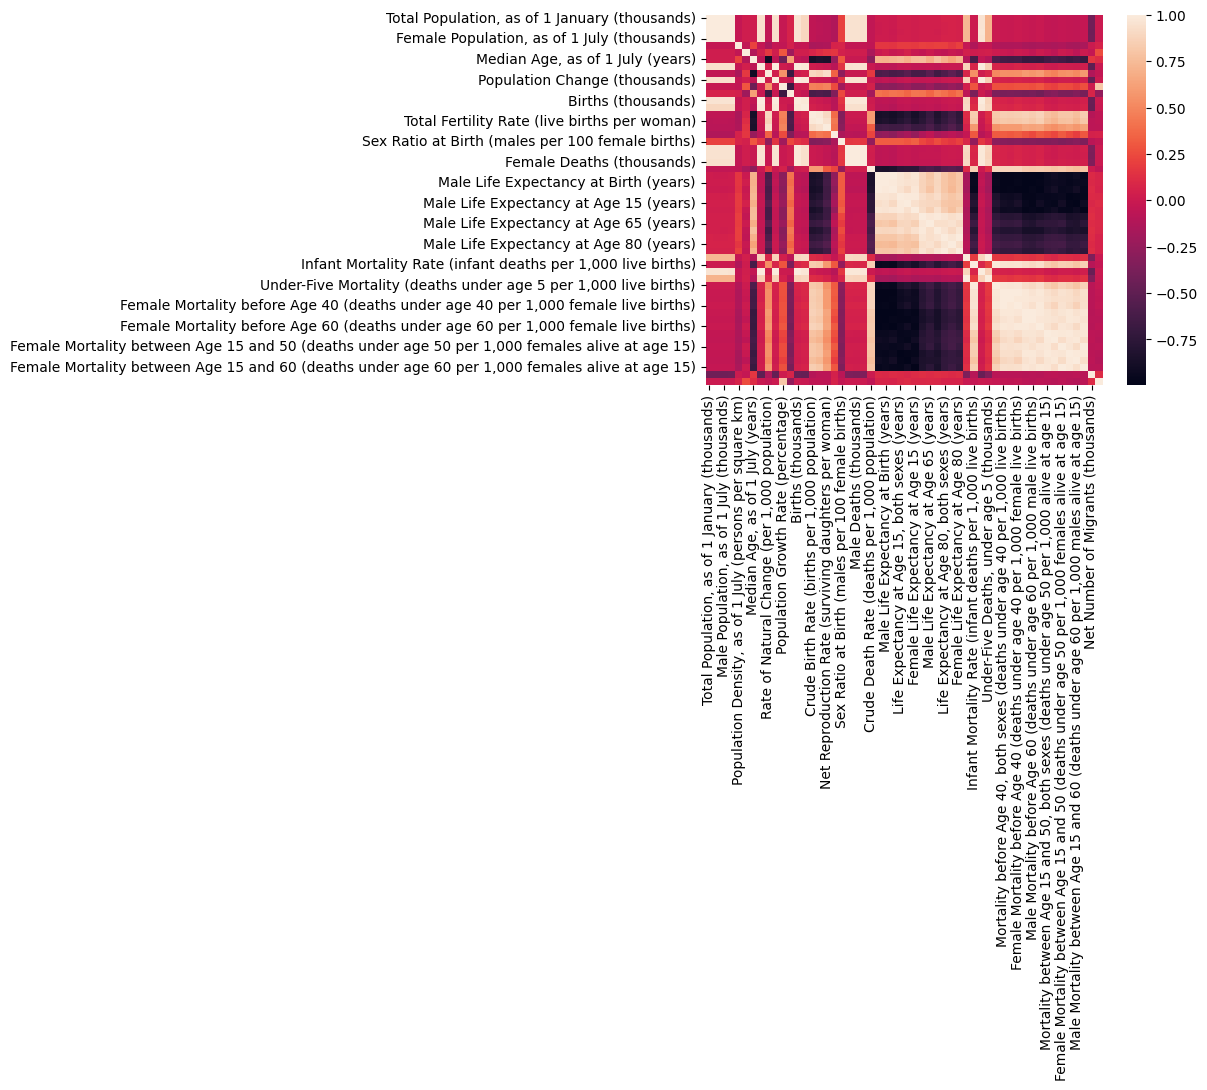

In [34]:
# corilation between columns
df_estimates_value = df_estimates.iloc[:, 10:]
display(df_estimates_value.head())
sns.heatmap(df_estimates_value.corr())

In [35]:
df_estimates_corr = df_estimates_value.corr()

,"Total Population, as of 1 January (thousands)","Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",Population Change (thousands),...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
"Total Population, as of 1 January (thousands)",1.000000,0.999997,0.999935,0.999946,-0.033904,0.021218,0.021747,0.941530,-0.045559,0.943371,...,-0.024436,-0.010905,-0.041958,-0.047902,-0.034284,-0.040556,-0.045364,-0.034398,-0.421455,-0.000936
"Total Population, as of 1 July (thousands)",0.999997,1.000000,0.999945,0.999942,-0.033928,0.021333,0.021131,0.942402,-0.044965,0.944235,...,-0.023937,-0.010353,-0.041535,-0.047525,-0.033819,-0.040088,-0.044944,-0.033893,-0.422071,-0.000932
"Male Population, as of 1 July (thousands)",0.999935,0.999945,1.000000,0.999775,-0.032865,0.022775,0.019500,0.943394,-0.043388,0.945019,...,-0.023288,-0.009292,-0.040902,-0.047148,-0.032939,-0.039381,-0.044546,-0.032929,-0.427060,-0.001022
"Female Population, as of 1 July (thousands)",0.999946,0.999942,0.999775,1.000000,-0.033357,0.019857,0.022794,0.941282,-0.046570,0.943302,...,-0.024597,-0.011435,-0.042177,-0.047905,-0.034714,-0.040806,-0.045345,-0.034872,-0.416928,-0.000840
"Population Density, as of 1 July (persons per square km)",-0.033904,-0.033928,-0.032865,-0.033357,1.000000,-0.043196,0.220004,-0.033717,-0.159140,-0.035013,...,-0.164462,-0.145292,-0.142974,-0.149279,-0.131570,-0.161092,-0.169094,-0.147476,0.005580,0.064275
"Population Sex Ratio, as of 1 July (males per 100 females)",0.021218,0.021333,0.022775,0.019857,-0.043196,1.000000,-0.117690,0.035214,0.170467,0.034544,...,-0.048033,0.010571,-0.023388,-0.060918,0.003822,-0.018300,-0.067610,0.009652,-0.032794,0.253150
"Median Age, as of 1 July (years)",0.021747,0.021131,0.019500,0.022794,0.220004,-0.117690,1.000000,-0.063481,-0.912074,-0.057611,...,-0.692166,-0.701311,-0.642638,-0.620340,-0.649443,-0.686552,-0.656983,-0.696367,0.166480,0.118517
"Natural Change, Births minus Deaths (thousands)",0.941530,0.942402,0.943394,0.941282,-0.033717,0.035214,-0.063481,1.000000,0.037007,0.999301,...,0.043050,0.062589,0.016707,0.005222,0.029293,0.023804,0.013229,0.034429,-0.508456,-0.004993
"Rate of Natural Change (per 1,000 population)",-0.045559,-0.044965,-0.043388,-0.046570,-0.159140,0.170467,-0.912074,0.037007,1.000000,0.032373,...,0.569947,0.601994,0.509239,0.477371,0.535366,0.553397,0.512045,0.581951,-0.124981,-0.041419
Population Change (thousands),0.943371,0.944235,0.945019,0.943302,-0.035013,0.034544,-0.057611,0.999301,0.032373,1.000000,...,0.040223,0.059791,0.014043,0.002568,0.026687,0.020996,0.010532,0.031590,-0.475919,-0.000450


In [44]:
corrilation_groups = dict()
thereshold = 0.95
for row in df_estimates_corr.iterrows():
    corrilation_groups[row[0]] = list()
    for col in row[1].iteritems():
        if np.abs(col[1]) > thereshold:
            if col[0] != row[0]:
                corrilation_groups[row[0]].append(col[0])
                corrilation_groups[row[0]] = list(set(corrilation_groups[row[0]]))

json.dump(corrilation_groups, open('../../data/WPP2022/corrilation/corrilation_groups_{}.json'.format(int(thereshold*100)), 'w'))


C:\Users\amira\AppData\Local\Temp\ipykernel_20868\1447948903.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col in row[1].iteritems():


## remove columns with corrilation 

In [61]:
columns_without_corrilation = ['Variant',
                                'Region, subregion, country or area *',
                                'Notes',
                                'Location code',
                                'ISO3 Alpha-code',
                                'ISO2 Alpha-code',
                                'SDMX code**',
                                'Type',
                                'Parent code',
                                'Year',"Births (thousands)",
                                "Population Density, as of 1 July (persons per square km)",
                                "Population Sex Ratio, as of 1 July (males per 100 females)",
                                "Population Growth Rate (percentage)",
                                "Population Annual Doubling Time (years)",
                                "Rate of Natural Change (per 1,000 population)",
                                "Crude Birth Rate (births per 1,000 population)",
                                "Mean Age Childbearing (years)",
                                "Sex Ratio at Birth (males per 100 female births)",
                                "Crude Death Rate (deaths per 1,000 population)",
                                "Under-Five Deaths, under age 5 (thousands)",
                                "Net Number of Migrants (thousands)",
                                "Net Migration Rate (per 1,000 population)",
                                "Life Expectancy at Age 65, both sexes (years)",
                                "Life Expectancy at Birth, both sexes (years)"]

<Axes: >

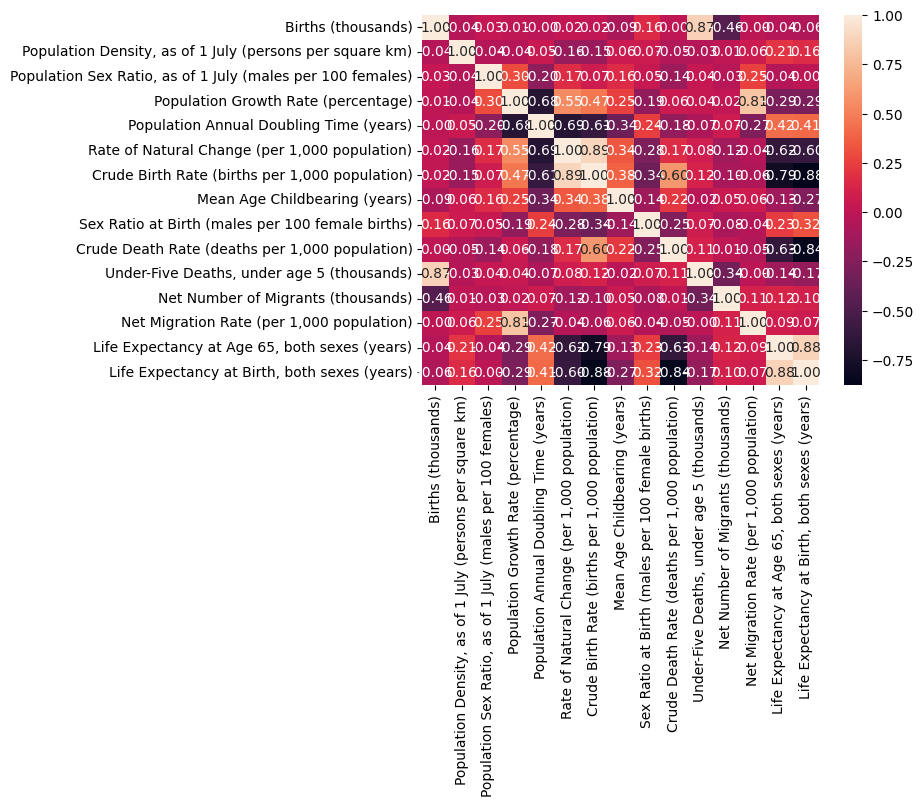

In [65]:
df_estimates_without_corr = df_estimates[columns_without_corrilation].copy()
sns.heatmap(df_estimates_without_corr.iloc[:, 10:].corr(), annot=True, fmt=".2f")